# Word Count of Oz
In this project we will use the spacy and nltk libraries to do a word count of The Stories of Oz from project gutenburg. The start of this text is kept in a pickle file and will need to be extracted.. Prior to starting this analysis the libraries and english core word library from spacy are installed.
    
The code, along with the files necessary and versions of packages in this instance can be found on this repo: https://github.com/Benjamin-Siebold/MSDS-682-Text-Analytics

In [1]:
import spacy
import nltk
nlp = spacy.load('en_core_web_lg')
from wordcloud import WordCloud
from PIL import Image

import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

### 1 Create cleaning function and load data
The first step is to read in the pickle file and turn it into a single string, along with copy and paste the cleaning function we created in week 1.

In [2]:
def clean_text(text):
    nlp_text = nlp(text)
    lemmas = [w.lower_ if w.lemma == '-PRON-' else w.lemma_ 
              for w in nlp_text if w.is_alpha and not w.is_stop]
    return ' '.join(lemmas)

In [3]:
woo = []
with open('wizard_of_oz_stories.pk', 'rb') as oz:
    woo.append(pickle.load(oz))

In [4]:
oz = [sentence for chapter in woo for sentence in chapter]

In [5]:
oz_text = ' '.join(oz)

In [6]:
cleaned_oz = clean_text(oz_text)

### 2 Create ranking functions for 10 and 50
The next step is to apply the nltk FreqDist function to generate a word count on our text, from their we can see the top ranked words, and create two separate DataFrames, one with all words appearing more than 50 times, and one with all words appearing more than 10. We can see the word "say" appears far more than any other word. After say, other words start to follow a more steady slope of word differences, which may be contradictory to Zipf's Law

In [7]:
oz_ranking = nltk.FreqDist(cleaned_oz.split())

In [8]:
oz_ranking_df = pd.DataFrame.from_dict(oz_ranking, orient='index')
oz_ranking_df.columns = ['Frequency']

In [9]:
oz_greater_50 = oz_ranking_df[oz_ranking_df['Frequency'] > 50]

In [10]:
oz_greater_50

,Frequency
say,75


In [11]:
oz_greater_10 = oz_ranking_df[oz_ranking_df['Frequency'] > 10]

In [12]:
oz_greater_10.sort_values(by=['Frequency'], ascending=False)

,Frequency
say,75
Wizard,47
little,45
head,42
Ozma,41
...,...
sharp,11
Emerald,11
turn,11
place,11


In [13]:
pd.set_option('display.max_rows', 88)

In [14]:
oz_greater_10.sort_values(by=['Frequency'], ascending=False)

,Frequency
say,75
Wizard,47
little,45
head,42
Ozma,41
man,37
King,34
Jack,31
Oz,30
Dorothy,30


### 3 Create Wordcloud
The last step is to create two word clouds, one standard and one using a mask.

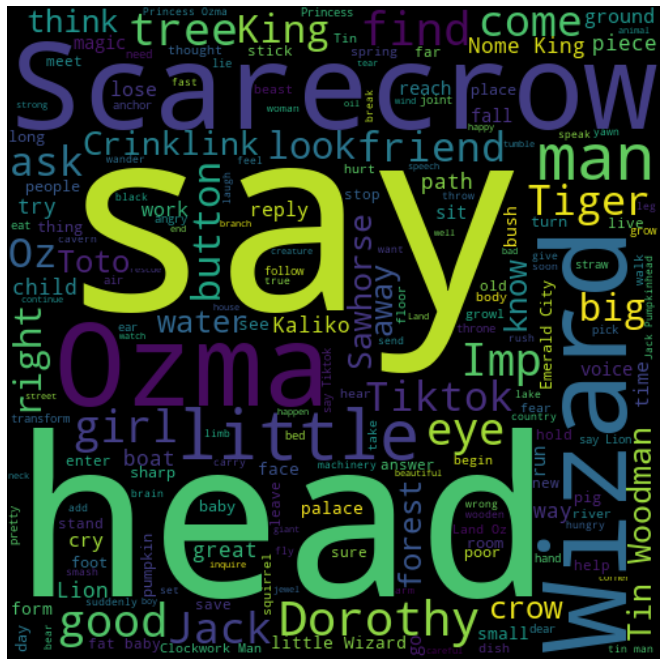

In [15]:
fig = plt.figure(figsize=(12, 12))
wordcloud = WordCloud(width=500, height=500).generate(cleaned_oz)
plt.imshow(wordcloud, interpolation='bilinear')
_ = plt.axis("off")

In [16]:
oz_mask = np.array(Image.open("oz.png"))

In [17]:
wc = WordCloud(background_color="black", max_words=2000, mask=oz_mask, contour_width=20, contour_color='steelblue')

In [18]:
wc.generate(cleaned_oz)

In [19]:
wc.to_file("fun_oz.png")

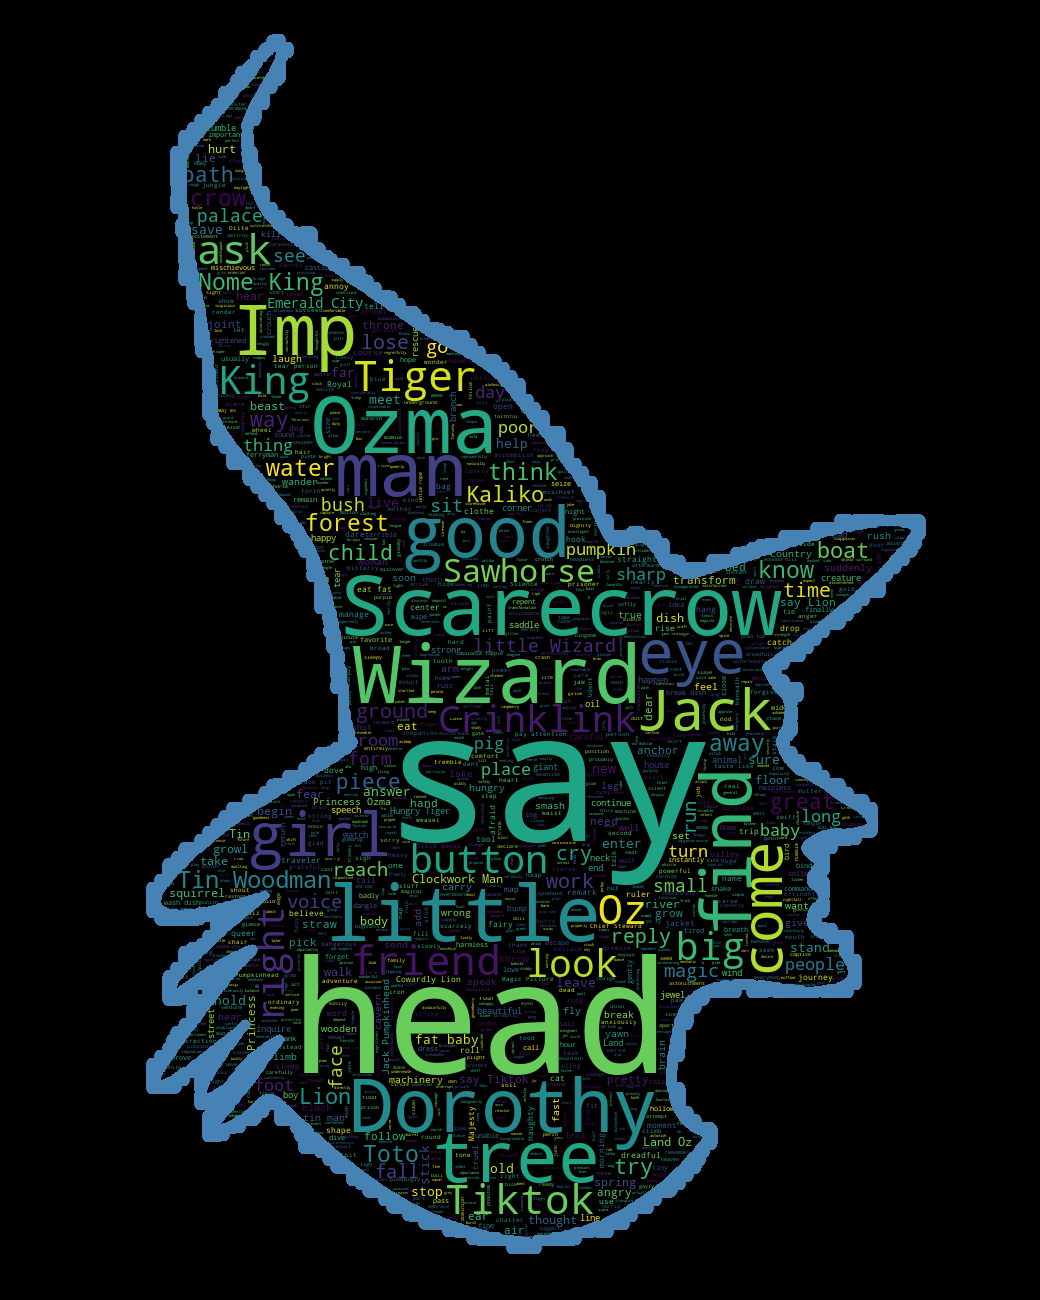

In [22]:
from IPython.display import Image
Image('fun_oz.png')

# References

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.from_dict.html

http://getyourimage.club/resize-15-may.html
